In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.plot_settings import get_figsize, LINE_STYLES, DPI
import os
from SBL_algs.SBL_Fast import SBL_Fast_Vector
from utils.Process_sim_data import load_nearfield, transform_nearfield_to_vector, transform_vector_to_nearfield
from radiation.sphere_wave import abF_matrix_alt, F_matrix_alt, Fmnc, F_expansion, nm_expansion, inverse_nm_expansion
import importlib
from utils.plot import plot_Fcoefficient_magnitudes, plot3D, plot_abcoefficient_magnitudes, vec_MSE

In [2]:
r = 50e-3
f = 2.4e9
k = 2*np.pi*f/(3e8)
filename = 'dipole_nearfield_spherical.txt'

In [3]:
filename = 'dipole_nearfield_spherical.txt'
Efield_us = load_nearfield(filename, undersampling=10)
Efield_us_vec = transform_nearfield_to_vector(Efield_us)

## Spherical wave mode expansion with n and m coefficients

In [4]:
ab_coeffs_exp = nm_expansion(Efield_us, 17, k, r)

In [5]:
abF,nms_idx,thetaphi_idx = abF_matrix_alt(Efield_us.theta, Efield_us.phi, R=r, N_modes=17, k=k)

In [7]:
Efield_exp_vec = np.zeros_like(Efield_us_vec)
for i in range(3):
        Efield_exp_vec[:,i] = (abF[:,:,i] @ ab_coeffs_exp).flatten()
Efield_exp = transform_vector_to_nearfield(Efield_exp_vec, Efield_us.theta, Efield_us.phi)

In [8]:
vec_MSE(Efield_exp_vec,Efield_us_vec)

Relative MSE: 97.70807162050754
Relative MSE (r): 17.76651391210687
Relative MSE (theta): 185.95979291090705
Relative MSE (phi): 11.82767635234874


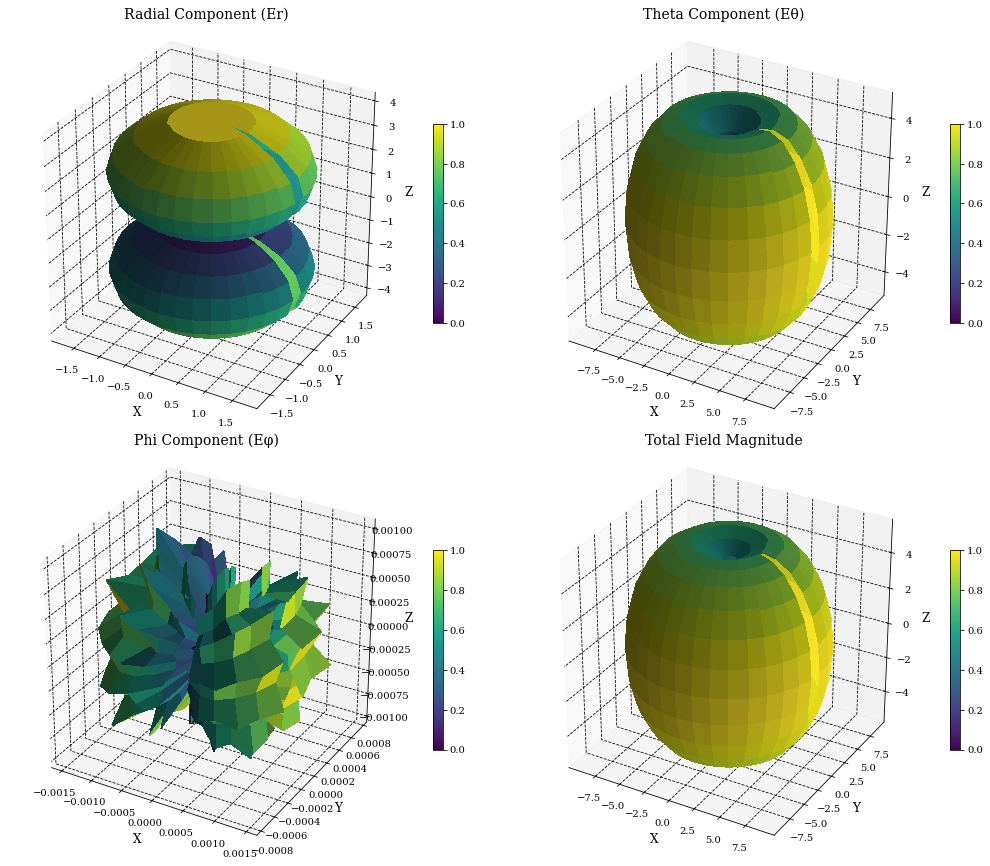

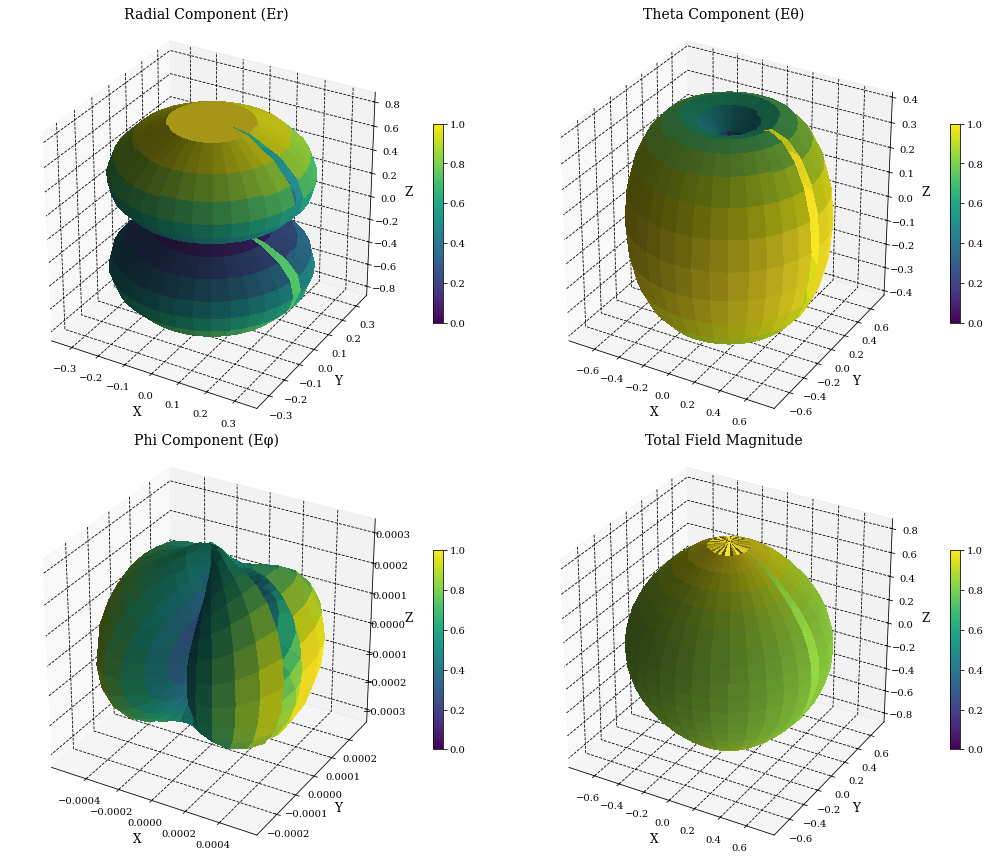

In [12]:
plot3D(Efield_exp, Efield_exp.theta, Efield_exp.phi, r)
plot3D(Efield_us, Efield_us.theta, Efield_us.phi, r)


## SBL with F coefficients

In [13]:
F, nms_idx,_ = F_matrix_alt(Efield_us.theta, Efield_us.phi, R=r, N_modes=17, k=k)
sbl_vec_F = SBL_Fast_Vector(Efield_us_vec, F, max_iter=100, threshold=1e-8)
w_est_F, basis = sbl_vec_F.fit()

/home/jonas/Dokumente/Uni/12_Semester/Project/Code/SBL_algs/SBL_Fast.py:188: RuntimeWarning: invalid value encountered in multiply
  self.alpha = np.inf * np.ones(self.D, dtype=complex)
/home/jonas/Dokumente/Uni/12_Semester/Project/Code/SBL_algs/SBL_Fast.py:240: RuntimeWarning: invalid value encountered in divide
  s = np.where(np.isinf(self.alpha), S, (self.alpha * S) / (self.alpha - S))
/home/jonas/Dokumente/Uni/12_Semester/Project/Code/SBL_algs/SBL_Fast.py:241: RuntimeWarning: invalid value encountered in divide
  q = np.where(np.isinf(self.alpha), Q, (self.alpha * Q) / (self.alpha - S))


In [14]:
Efield_SBLF_vec = np.zeros_like(Efield_us_vec)
for i in range(3):
        Efield_SBLF_vec[:,i] = F[:,:,i] @ w_est_F
Efield_SBLF = transform_vector_to_nearfield(Efield_SBLF_vec, Efield_us.theta, Efield_us.phi)

Relative MSE: 0.7276531100668803
Relative MSE (r): 0.7916254949107305
Relative MSE (theta): 0.6570305395957137
Relative MSE (phi): 1.0


/home/jonas/Dokumente/Uni/12_Semester/Project/Code/utils/plot.py:45: RuntimeWarning: invalid value encountered in divide
  surf3 = ax3.plot_surface(X_total,Y_total,Z_total, facecolors=cmap(Ephi_mag/np.max(Ephi_mag)),


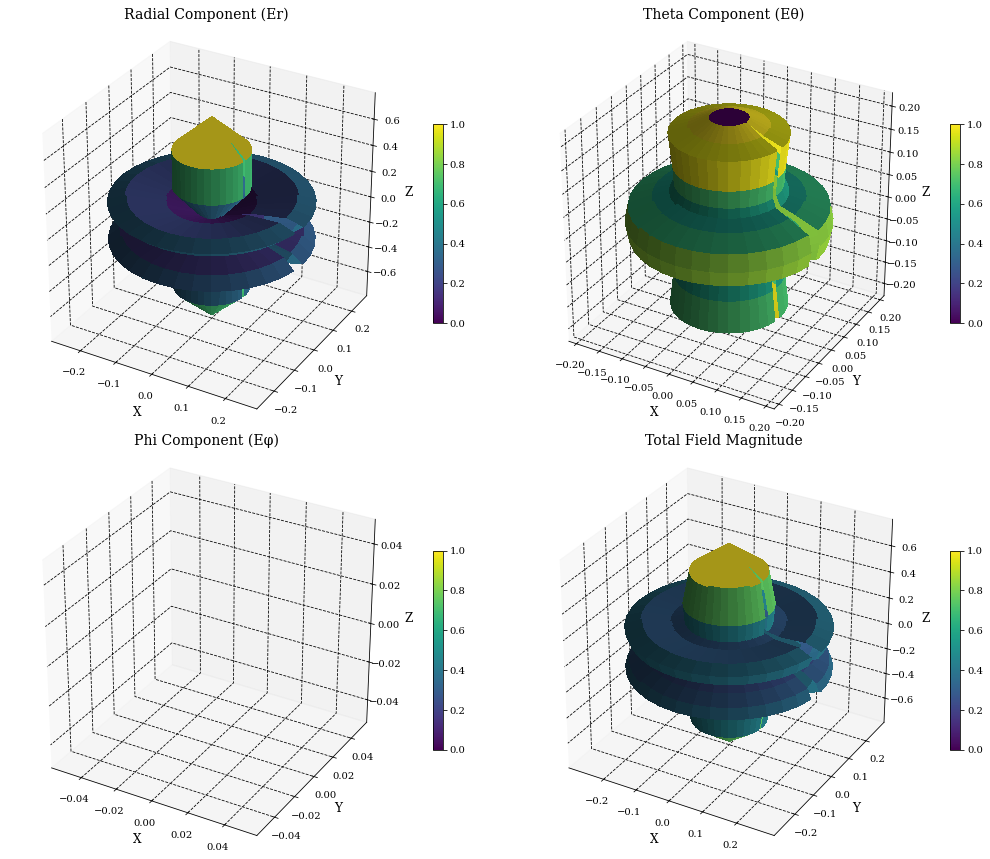

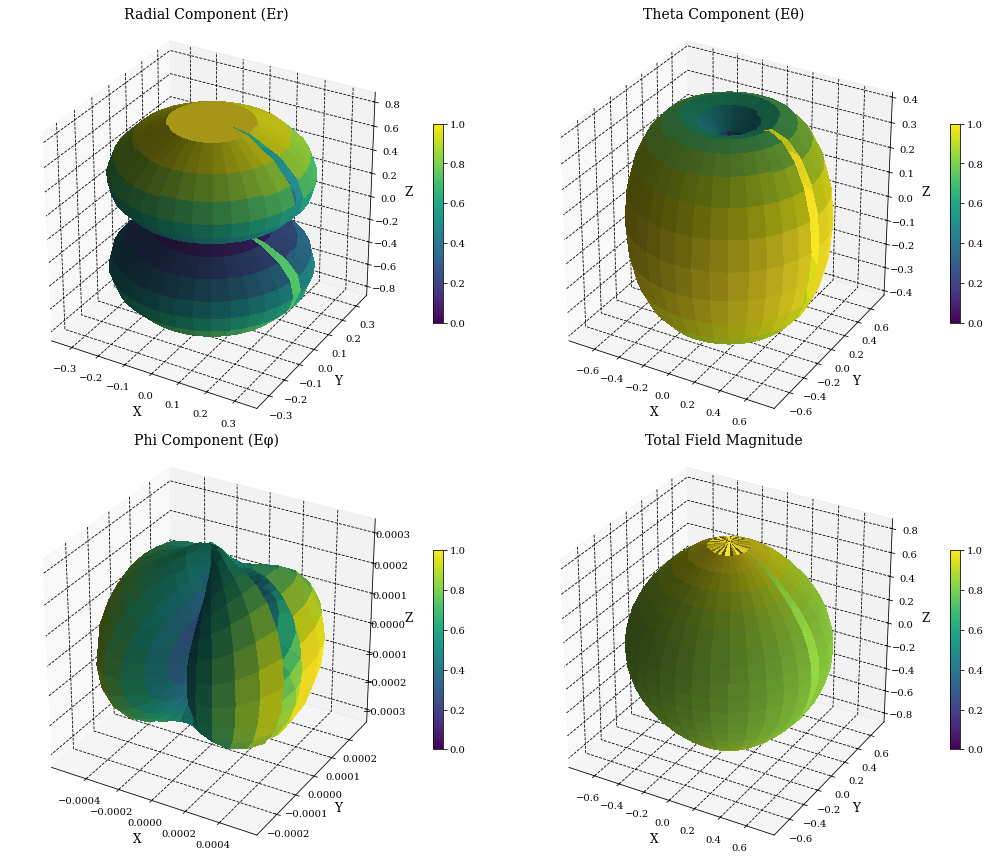

In [15]:
vec_MSE(Efield_SBLF_vec,Efield_us_vec)
plot3D(Efield_SBLF, Efield_exp.theta, Efield_exp.phi, r)
plot3D(Efield_us, Efield_us.theta, Efield_us.phi, r)

## SBL with m&n coefficients

In [16]:
mn_mat, nms_idx,_ = F_matrix_alt(Efield_us.theta, Efield_us.phi, R=r, N_modes=17, k=k)
sbl_vec_mn = SBL_Fast_Vector(Efield_us_vec, mn_mat, max_iter=100, threshold=1e-8)
w_est_mn, basis = sbl_vec_mn.fit()

In [17]:
Efield_SBLmn_vec = np.zeros_like(Efield_us_vec)
for i in range(3):
        Efield_SBLmn_vec[:,i] = F[:,:,i] @ w_est_mn
Efield_SBLmn = transform_vector_to_nearfield(Efield_SBLmn_vec, Efield_us.theta, Efield_us.phi)

Relative MSE: 0.7276531100668803
Relative MSE (r): 0.7916254949107305
Relative MSE (theta): 0.6570305395957137
Relative MSE (phi): 1.0
Relative MSE: 0.7276531100668803
Relative MSE (r): 0.7916254949107305
Relative MSE (theta): 0.6570305395957137
Relative MSE (phi): 1.0


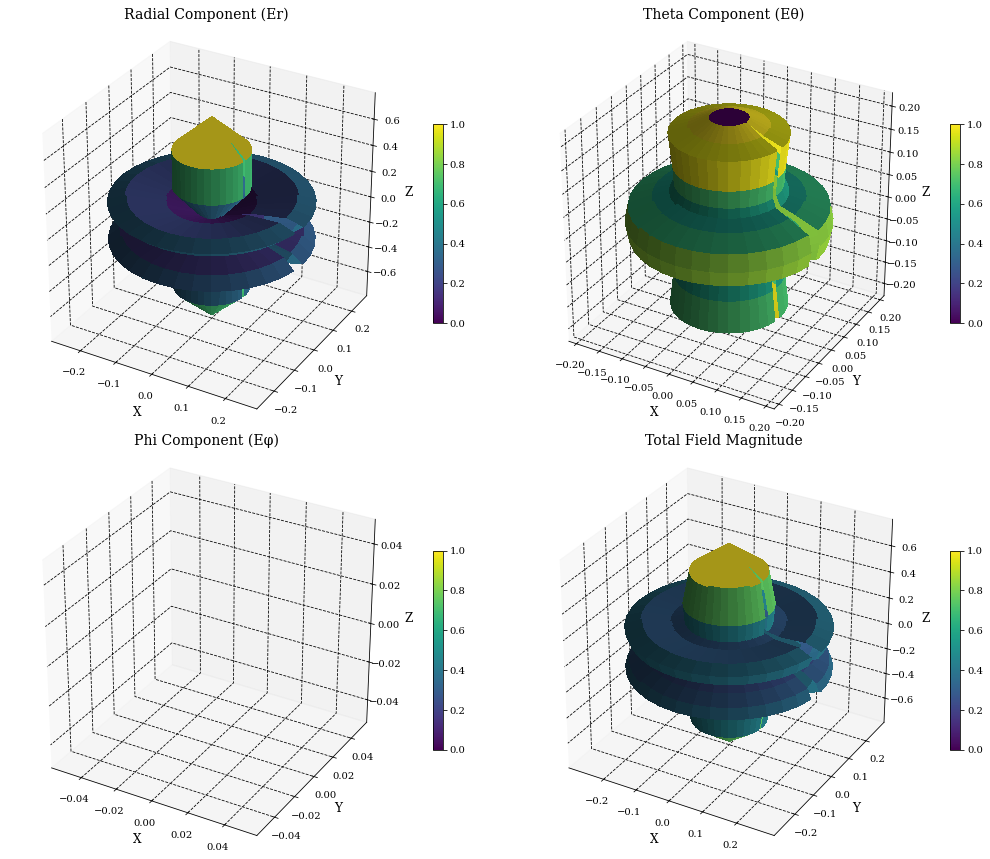

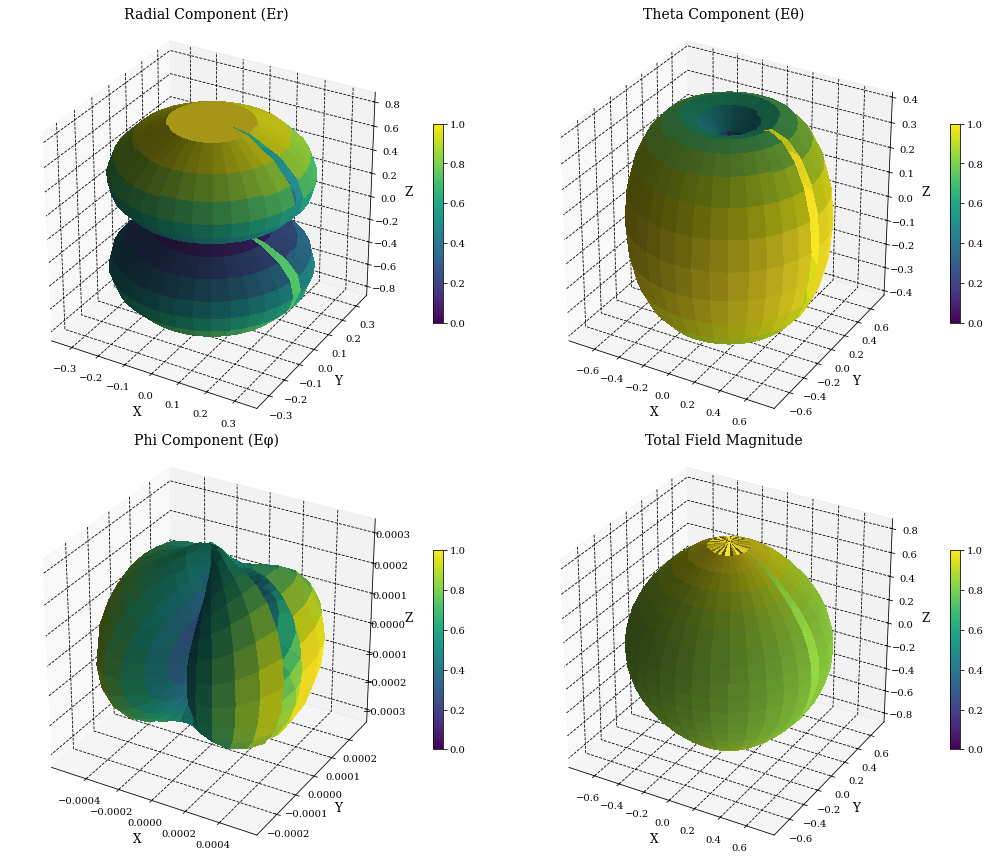

In [18]:
vec_MSE(Efield_SBLmn_vec,Efield_us_vec)
vec_MSE(Efield_SBLF_vec,Efield_us_vec)
plot3D(Efield_SBLmn, Efield_exp.theta, Efield_exp.phi, r)
plot3D(Efield_us, Efield_us.theta, Efield_us.phi, r)